In [1]:
import glob
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [2]:
DataDir = 'ignore_folder/data'
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 
                  'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 
                  'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 
                  'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 
                  'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 
                  'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 
                  'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 
                  'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 
                  'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 
                  'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 
                  'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 
                  'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 
                  'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 
                  'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 
                  'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 
                  'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 
                  'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 
                  'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 
                  'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 
                  'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 
                  'a5ce', 'a457', 'adab', 'aa46', 'a46a']
IMG_X = 100
IMG_Y = 100

In [3]:
def create_training_data():
    """takes no arguments, accessess data in file and returns it as a list containing [0] a unique id, 
    [1] category, [2] class_type, [3] category + class_type, [4] horizontal average, [5] vertical average, 
    [6] the original image resized to be a 100 X 100 array"""
    data = []
    unique_id = 0
    for category in Categories_all:
        path = os.path.join(DataDir, category)
        class_num = Categories_all.index(category)
        for img in os.listdir(path):
            if 'jinwen' in img:
                class_type = 'jinwen'
            if 'chuxi' in img:
                class_type = 'chuxi'
            if 'smallseal' in img:
                class_type = 'smallseal'
            if 'oracle' in img:
                class_type = 'oracle'
            try:
                img_array = cv2.imread(os.path.join(path,img), 
                                       cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                horizontal_average = np.average(new_array, axis=1)
                vertical_average = np.average(new_array, axis=0)
                data.append([unique_id, category, class_type, category + "-" + class_type, 
                             horizontal_average, vertical_average, new_array])
                unique_id += 1
            except Exception as e:
                print('something went wrong')
    return data

In [4]:
complete_data = create_training_data()

In [5]:
complete_data[0][0]

0

In [6]:
complete_data[-1][0]

8231

In [7]:
len(complete_data)

8232

In [9]:
indexed_complete_data = complete_data.copy()

In [10]:
def shuffle(data):
    """takes a list of data as an input and outputs a shuffled list 
    with 100 testing data elements and the rest as training data"""
    random.shuffle(data)
    testing_data = data[-100:]
    training_data = data[0:-100]
    return data, testing_data, training_data

In [11]:
shuffled_data, testing_data, training_data = shuffle(complete_data)

In [13]:
shuffled_data[0][0]

8081

In [14]:
complete_data[0][0]

8081

In [15]:
indexed_complete_data[0][0]

0

In [16]:
shuffled_data[0]

[8081,
 'a46a',
 'jinwen',
 'a46a-jinwen',
 array([  0.  ,   1.46,   3.08,   3.09,   5.9 ,   9.97,  12.01,  12.88,
         12.88,  12.88,  12.88,  12.88,  12.88,  12.03,  10.03,   9.79,
          9.79,   9.79,   9.79,   9.26,   7.25,   8.17,  10.17,  12.18,
         12.87,  13.11,  15.16,  18.5 ,  22.89,  29.04,  36.42,  45.02,
         55.3 ,  64.9 ,  73.42,  83.48,  93.15, 101.79, 105.15, 107.74,
        111.74, 114.37, 114.46, 105.93, 100.4 ,  95.91,  87.55,  80.3 ,
         73.83,  67.56,  59.22,  48.82,  44.39,  42.05,  42.25,  42.24,
         42.05,  41.71,  41.56,  41.6 ,  41.93,  45.08,  48.03,  46.02,
         46.76,  48.62,  48.34,  48.27,  48.41,  50.5 ,  52.7 ,  55.05,
         54.94,  54.84,  54.81,  56.56,  57.18,  55.22,  56.61,  58.18,
         58.08,  59.48,  61.08,  61.22,  61.46,  61.41,  59.04,  58.06,
         58.01,  55.73,  50.41,  42.03,  31.6 ,  22.03,  13.82,   7.23,
          2.4 ,   0.39,   0.  ,   0.  ]),
 array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

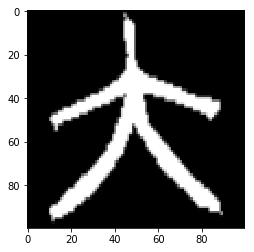

In [17]:
plt.imshow(shuffled_data[0][-1], cmap='gray')

In [ ]:
# def fingerprint_test(sample_picture, fingerprint_data):
#     horizontal_average = np.average(sample_picture[0], axis=1)
#     vertical_average = np.average(sample_picture[0], axis=0)
#     best_guess = []
#     for x in fingerprint_data:
#         best_guess.append([int(sum(abs(horizontal_average-x[0])) 
#                                + sum(abs(vertical_average-x[1]))), 
#                            x[2] + "-" + x[3]])
#     best_guess_index = np.argmin([x[0] for x in best_guess])
#     print('right before it crashes')
#     return [best_guess[best_guess_index][1], 
#             training_data[best_guess_index][0]]

In [18]:
def fingerprint_test(testing, training):
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0]])
        guess_index = np.argmin([x[0] for x in best_guess])
        guesses.append([x[0], best_guess[guess_index][1]])
    return guesses

In [19]:
test = fingerprint_test(testing_data, training_data)

In [138]:
sample_pictures = []
for x in testing_data:
    

[[8228,
  'a46a',
  'chuxi',
  'a46a-chuxi',
  array([ 0.  ,  2.93,  6.19,  6.34,  7.84, 10.03, 12.02, 14.03, 15.96,
         15.96, 15.96, 15.96, 17.88, 20.02, 22.31, 44.95, 67.14, 83.84,
         95.46, 99.09, 84.52, 69.81, 56.74, 50.67, 44.48, 39.15, 41.1 ,
         44.38, 48.42, 48.34, 48.22, 48.04, 46.33, 44.48, 42.42, 40.29,
         37.35, 32.9 , 32.21, 33.45, 37.52, 41.82, 46.54, 52.67, 53.57,
         51.9 , 51.67, 47.89, 41.92, 44.23, 44.37, 42.35, 40.22, 38.97,
         38.88, 36.91, 35.46, 35.45, 32.22, 29.83, 31.83, 33.88, 34.77,
         30.76, 30.68, 32.21, 30.  , 28.99, 28.96, 31.16, 30.08, 25.72,
         27.59, 27.99, 26.02, 27.57, 28.18, 26.18, 24.  , 21.8 , 19.65,
         15.94, 12.08, 10.07,  9.38,  9.15,  7.08,  7.56,  9.71,  7.7 ,
          6.7 ,  6.7 ,  6.7 ,  5.84,  3.81,  5.36,  5.17,  0.83,  0.  ,
          0.  ]),
  array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
           0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   2.71,

In [20]:
len(test)

100

In [21]:
def give_score(test):
    total = 0
    correct = 0
    for x, y in test:
        if indexed_complete_data[x][1] == indexed_complete_data[y][1]:
            correct += 1
        total += 1
    return correct/total

In [22]:
score = give_score(test)

In [23]:
score

0.71

In [136]:
len(test)

100

In [24]:
test[0]

[7587, 7599]

a4fd-jinwen


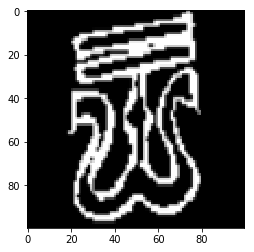

In [36]:
print(indexed_complete_data[test[0][0]][3])
plt.imshow(indexed_complete_data[test[41][0]][-1], cmap='gray')

a46b-chuxi


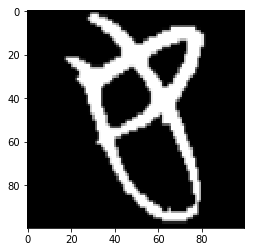

In [37]:
print(indexed_complete_data[test[41][1]][3])
plt.imshow(indexed_complete_data[test[41][1]][-1], cmap='gray')

In [154]:
shuffled_data[test[0][1]][4] - shuffled_data[test[0][0]][4]



array([ 3.530e+00,  2.801e+01,  5.796e+01,  7.258e+01,  8.308e+01,
        8.832e+01,  6.936e+01,  5.639e+01,  4.776e+01,  3.705e+01,
        3.284e+01,  3.518e+01,  3.520e+01,  3.698e+01,  4.130e+01,
        6.032e+01,  7.688e+01,  8.546e+01,  8.367e+01,  7.999e+01,
        7.784e+01,  6.804e+01,  5.546e+01,  4.293e+01,  3.046e+01,
        1.912e+01,  1.694e+01,  1.485e+01,  1.341e+01,  2.817e+01,
        4.392e+01,  6.071e+01,  7.300e+01,  7.679e+01,  6.903e+01,
        5.865e+01,  4.876e+01,  4.025e+01,  2.676e+01,  1.607e+01,
        1.625e+01,  3.870e+00, -1.397e+01, -3.499e+01, -3.953e+01,
       -3.461e+01, -2.391e+01, -1.563e+01, -9.240e+00, -4.960e+00,
       -2.870e+00, -2.910e+00,  3.300e+00,  4.230e+00, -2.410e+00,
       -3.480e+00, -3.610e+00, -3.410e+00, -3.130e+00, -3.520e+00,
       -5.650e+00, -7.850e+00, -1.126e+01, -1.945e+01, -2.380e+01,
       -2.563e+01, -2.357e+01, -2.169e+01, -1.997e+01, -1.949e+01,
       -1.616e+01, -1.001e+01, -5.630e+00, -1.440e+00,  2.620e

In [157]:
sum(abs(shuffled_data[test[0][1]][5] - shuffled_data[test[0][0]][5])) + sum(abs(shuffled_data[test[0][1]][4] - shuffled_data[test[0][0]][4]))

4583.1